In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def dispersion_kelvin(k):
    """
    Dispersion relation for Kelvin waves.

    Parameters:
    k : array-like
        Nondimensional wavenumber values.

    Returns:
    omega_positive : array-like
        Nondimensional positive frequency (omega) values, NaN for negative values.

    Notes:
    The original function is real-valued and exhibits Hermitian symmetry in the wavenumber-frequency space.
    By convention, scientists retain only the positive frequencies, and this function follows that tradition.
    """
    dispersion_relation = lambda k: k
    omega = dispersion_relation(k)
    omega_positive = np.where(omega >= 0, omega, np.nan)
    return omega_positive


def dispersion_mrg(k):
    """
    Dispersion relation for Mixed Rossby-Gravity (MRG) waves.

    Parameters:
    k : array-like
        Nondimensional wavenumber values.

    Returns:
    omega_positive : array-like
        Nondimensional positive frequency (omega) values, NaN for negative values.

    Notes:
    The original function is real-valued and exhibits Hermitian symmetry in the wavenumber-frequency space.
    By convention, scientists retain only the positive frequencies, and this function follows that tradition.
    """
    dispersion_relation = lambda k: k / 2 + np.sqrt(1 + k**2 / 4)
    omega = dispersion_relation(k)
    omega_positive = np.where(omega >= 0, omega, np.nan)
    return omega_positive


def dispersion_poincare(k, m=1, first_guess=np.inf, niter=50):
    """
    Dispersion relation for Poincaré waves.

    Parameters:
    k : array-like
        Nondimensional wavenumber values.
    m : int, optional
        Meridional mode number, default is 1.
    first_guess : float, optional
        Initial guess for omega, default is infinity.
    niter : int, optional
        Number of iterations for refinement, default is 50.

    Returns:
    omega_positive : array-like
        Nondimensional positive frequency (omega) values, NaN for negative values.

    Notes:
    The dispersion relation for Poincaré waves is a cubic function, making the analytical solution complex.
    An iterative approach is used to approximate the solution.
    The original function is real-valued and exhibits Hermitian symmetry in the wavenumber-frequency space.
    By tradition, only the positive frequencies are retained.
    """
    dispersion_relation = lambda omega: np.sqrt(2 * m + 1 + k**2 + k / omega)

    omega_approx = dispersion_relation(first_guess)
    for _ in range(niter):
        omega_approx = dispersion_relation(omega_approx)

    omega_positive = np.where(omega_approx >= 0, omega_approx, np.nan)
    return omega_positive


def dispersion_rossby(k, m=1, first_guess=0.0, niter=50):
    """
    Dispersion relation for Rossby waves.

    Parameters:
    k : array-like
        Nondimensional wavenumber values.
    m : int, optional
        Meridional mode number, default is 1.
    first_guess : float, optional
        Initial guess for omega, default is 0.
    niter : int, optional
        Number of iterations for refinement, default is 50.

    Returns:
    omega_positive : array-like
        Nondimensional positive frequency (omega) values, NaN for negative values.

    Notes:
    The dispersion relation for Rossby waves is a cubic function, making the analytical solution complex.
    An iterative approach is used to approximate the solution.
    The original function is real-valued and exhibits Hermitian symmetry in the wavenumber-frequency space.
    By tradition, only the positive frequencies are retained.
    """
    dispersion_relation = lambda omega: -(k + omega**3) / (2 * m + 1 + k**2)

    omega_approx = dispersion_relation(first_guess)
    for _ in range(niter):
        omega_approx = dispersion_relation(omega_approx)

    omega_positive = np.where(omega_approx >= 0, omega_approx, np.nan)
    return omega_positive

## Display Vallis Textbook

In [3]:
wn_range = np.array([-4, 4])
k_nd = np.linspace(wn_range[0], wn_range[1], 1024)

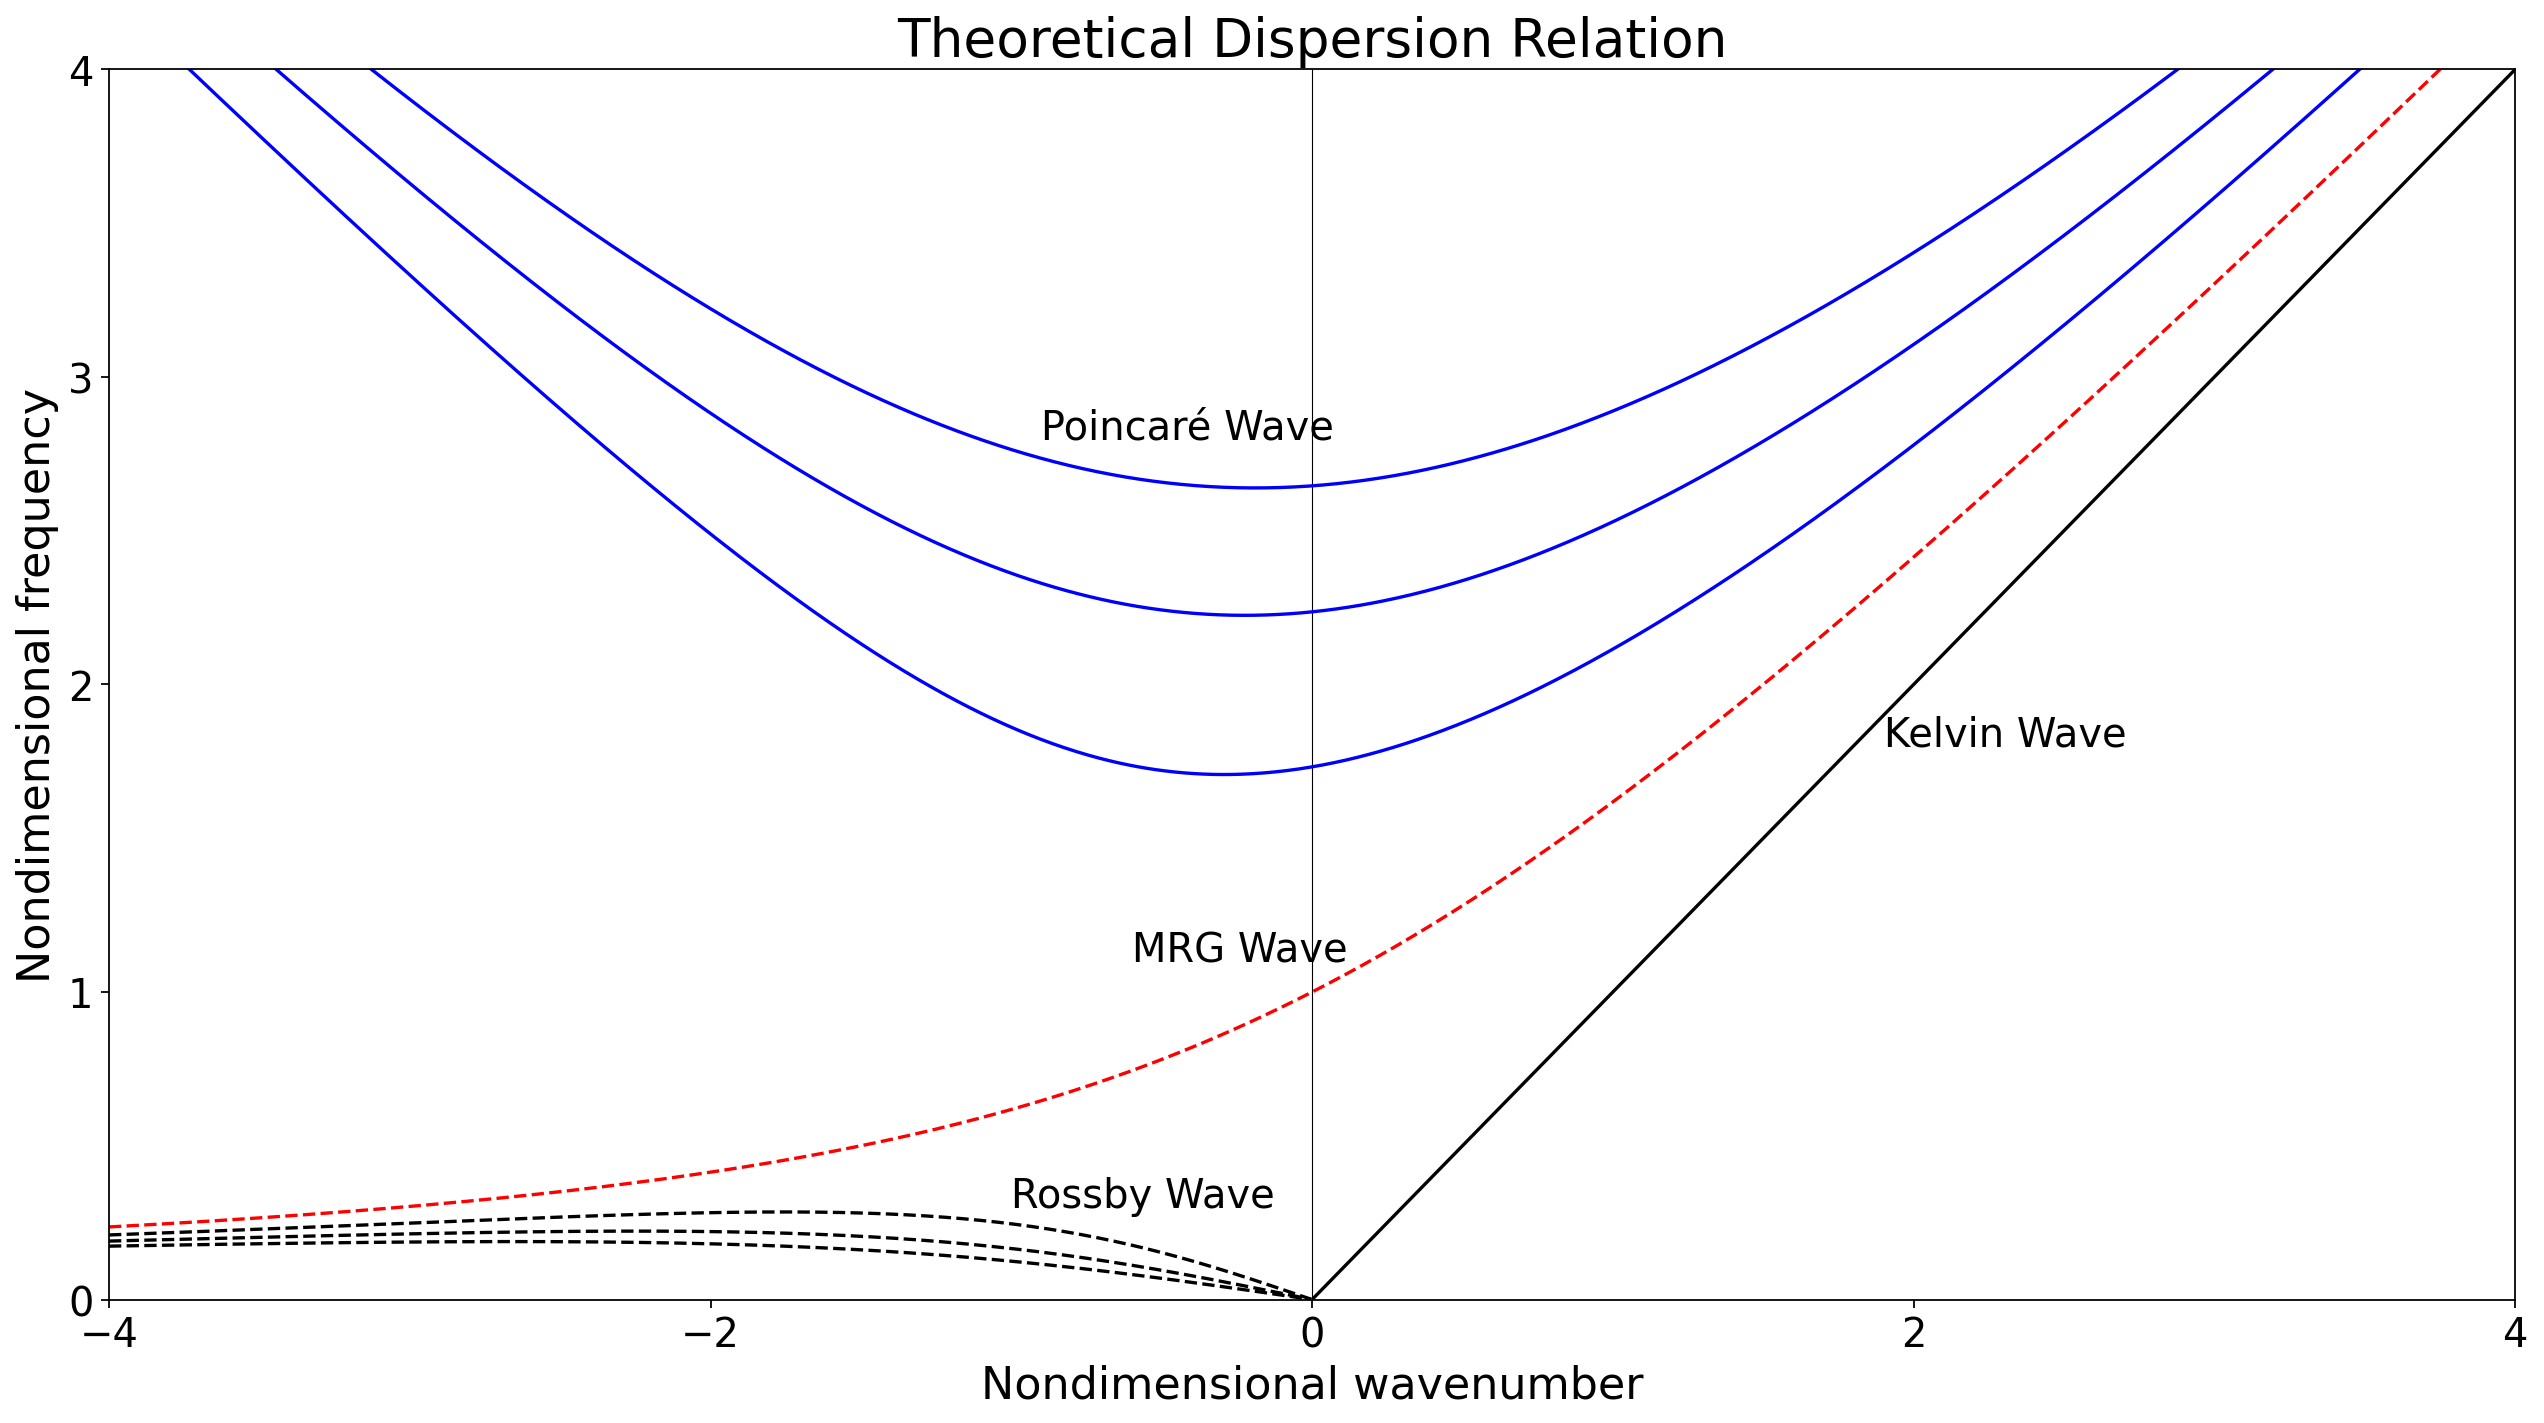

In [4]:
plt.figure(figsize=(16, 9), dpi=160)

# Reference line at k = 0
plt.plot([0, 0], [0, 4], "k-", lw=0.5)

# Kelvin wave
plt.plot(k_nd, dispersion_kelvin(k_nd), "k-")
plt.text(1.9, 1.8, "Kelvin Wave", fontsize=18)

# MRG wave
plt.plot(k_nd, dispersion_mrg(k_nd), "r--")
plt.text(-0.6, 1.1, "MRG Wave", fontsize=18)

# Poincaré wave
for m in range(1, 3 + 1):
    plt.plot(k_nd, dispersion_poincare(k_nd, m=m), "b")
plt.text(-0.9, 2.8, "Poincaré Wave", fontsize=18)

# Rossby wave
for m in range(1, 3 + 1):
    plt.plot(k_nd, dispersion_rossby(k_nd, m=m), "k--")
plt.text(-1, 0.3, "Rossby Wave", fontsize=18)

# Axis ticks and labels with larger font sizes
plt.xticks(np.linspace(wn_range[0], wn_range[1], 5, dtype=int), fontsize=18)
plt.yticks(np.linspace(0, 4, 5, dtype=int), fontsize=18)
plt.xlim(wn_range[0], wn_range[1])
plt.ylim(0, 4)
plt.xlabel("Nondimensional wavenumber", fontsize=20)
plt.ylabel("Nondimensional frequency", fontsize=20)

# Plot title with larger font size
plt.title("Theoretical Dispersion Relation", fontsize=24)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()

## Display Wheeler & Kiladis

In [5]:
# Constants
SIDEREAL_DAY_SECONDS = 86164.1  # Duration of sidereal day in seconds
SOLAR_DAY_SECONDS = 86400  # Duration of solar day in seconds
EARTH_ANGULAR_VELOCITY = (
    2 * np.pi / SIDEREAL_DAY_SECONDS
)  # Angular velocity of Earth in radians/second
EARTH_RADIUS_METERS = 6.371e6  # Radius of Earth in meters
EARTH_GRAVITY_ACCELERATION = (
    9.78  # Gravitational acceleration on Earth in meters/second^2
)


def get_f_beta(latitude=0.0):
    """
    Calculate the Coriolis frequency (f) and Rossby parameter (beta) at a given latitude.

    Parameters:
    latitude : float
        Latitude in radians.

    Returns:
    coriolis_frequency : float
        Coriolis frequency in 1/second.
    rossby_parameter : float
        Rossby parameter (beta) in 1/meter/second.
    """
    coriolis_frequency = (
        2 * EARTH_ANGULAR_VELOCITY * np.sin(latitude)
    )  # Coriolis frequency
    rossby_parameter = (
        2 * EARTH_ANGULAR_VELOCITY * np.cos(latitude) / EARTH_RADIUS_METERS
    )  # Rossby parameter (beta)
    return coriolis_frequency, rossby_parameter


def get_gravity_wave_speed(equivalent_depth):
    """
    Calculate the gravity wave speed for a given equivalent depth.

    Parameters:
    equivalent_depth : float
        Equivalent depth in meters.

    Returns:
    c : float
        Gravity wave speed in meters/second.
    """
    c = np.sqrt(EARTH_GRAVITY_ACCELERATION * equivalent_depth)  # Gravity wave speed
    return c


def rescale_to_days_and_ordinary_frequency(frequency):
    # Convert from (1/second) to (1/day) and from angular to ordinary frequency
    return frequency * SOLAR_DAY_SECONDS / (2 * np.pi)

In [6]:
#
zonal_wavemodes = np.linspace(-15, 15, 31)
reference_latitude_rad = np.deg2rad(0.0)
equivalent_depths = np.array([50.0, 25.0, 12.5])

#
zonal_wavenumbers = zonal_wavemodes / EARTH_RADIUS_METERS
f_coriolis, rossby_parameter = get_f_beta(reference_latitude_rad)
gravity_wave_speeds = get_gravity_wave_speed(equivalent_depths)

#
characteristic_length = np.sqrt(gravity_wave_speeds / rossby_parameter)
characteristic_time = 1 / np.sqrt(gravity_wave_speeds * rossby_parameter)

(0.0, 0.8)

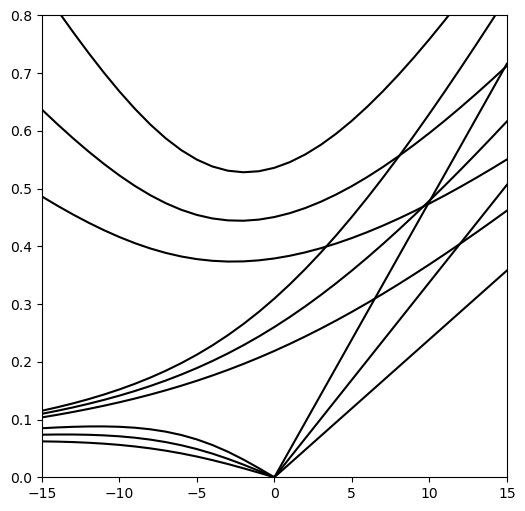

In [7]:
plt.figure(figsize=(6, 6), dpi=100)
#
for i in range(len(gravity_wave_speeds)):
    nondim_zonal_wavenumbers = zonal_wavenumbers * characteristic_length[i]
    nondim_frequency = dispersion_kelvin(nondim_zonal_wavenumbers)
    frequency = nondim_frequency * (1 / characteristic_time[i])
    frequency = rescale_to_days_and_ordinary_frequency(frequency)
    plt.plot(zonal_wavemodes, frequency, "k-")
#
for i in range(len(gravity_wave_speeds)):
    nondim_zonal_wavenumbers = zonal_wavenumbers * characteristic_length[i]
    nondim_frequency = dispersion_rossby(nondim_zonal_wavenumbers)
    frequency = nondim_frequency * (1 / characteristic_time[i])
    frequency = rescale_to_days_and_ordinary_frequency(frequency)
    plt.plot(zonal_wavemodes, frequency, "k-")
#
for i in range(len(gravity_wave_speeds)):
    nondim_zonal_wavenumbers = zonal_wavenumbers * characteristic_length[i]
    nondim_frequency = dispersion_poincare(nondim_zonal_wavenumbers)
    frequency = nondim_frequency * (1 / characteristic_time[i])
    frequency = rescale_to_days_and_ordinary_frequency(frequency)
    plt.plot(zonal_wavemodes, frequency, "k-")
#
for i in range(len(gravity_wave_speeds)):
    nondim_zonal_wavenumbers = zonal_wavenumbers * characteristic_length[i]
    nondim_frequency = dispersion_mrg(nondim_zonal_wavenumbers)
    frequency = nondim_frequency * (1 / characteristic_time[i])
    frequency = rescale_to_days_and_ordinary_frequency(frequency)
    plt.plot(zonal_wavemodes, frequency, "k-")
plt.xlim(-15, 15)
plt.ylim(0, 0.8)